In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# 1. Load the dataset
df = pd.read_csv('/content/StudentsPerformance.csv')

print("\nFirst five rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())


First five rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          

In [3]:
# 2. Check for duplicates and missing values
print("\nDuplicated rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\nMissing values:")
print(df.isnull().sum())


Duplicated rows: 0

Missing values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [4]:
# 3. Check for outliers in numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [5]:
# Option: Cap outliers (Winsorization)
df[numeric_cols] = df[numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

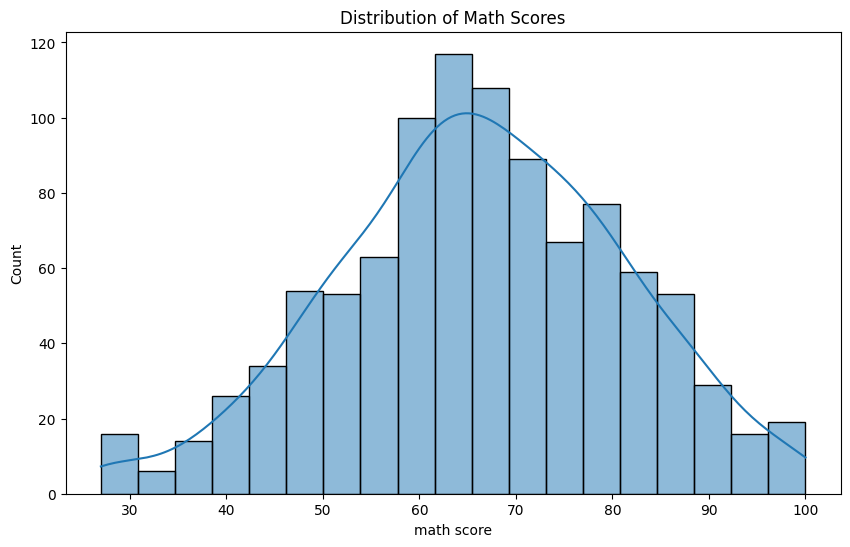

In [10]:
# 4. Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

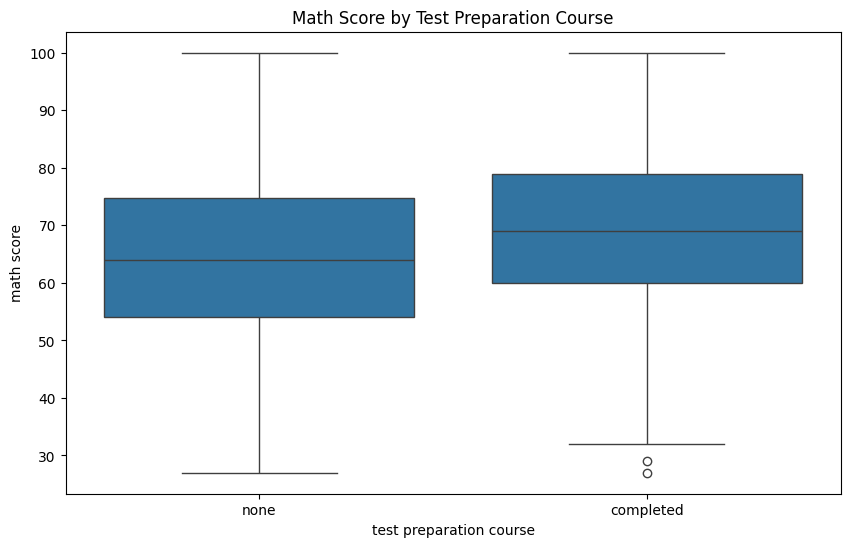

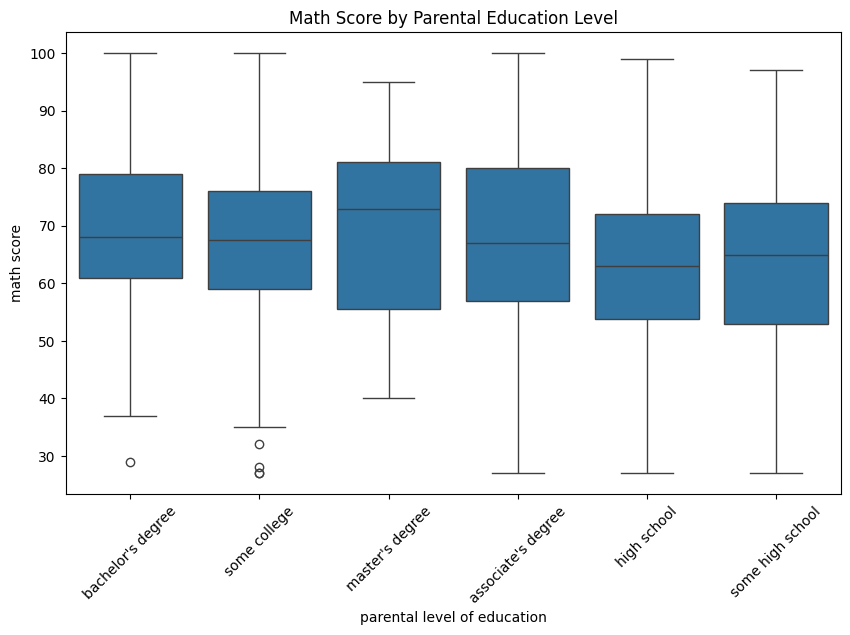

In [11]:
# Boxplots for categorical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score by Test Preparation Course")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Math Score by Parental Education Level")
plt.show()

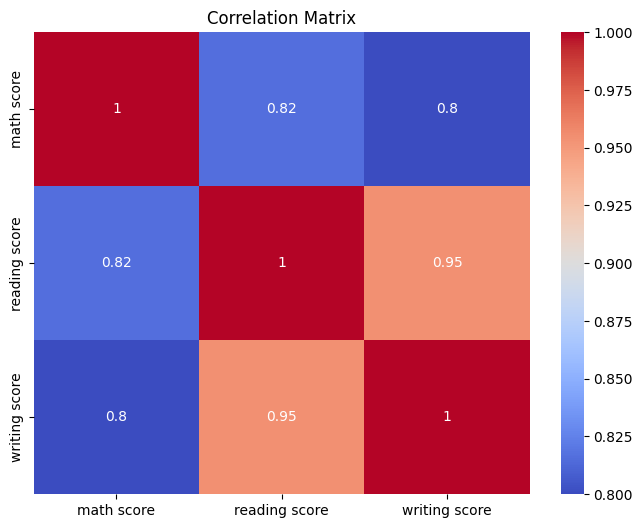

In [12]:
# Correlation matrix for numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
# 5. Encode categorical variables using OneHotEncoding
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

X = df.drop('math score', axis=1)
y = df['math score']

# Create a column transformer with OneHotEncoder
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features)
], remainder='passthrough')

# Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [14]:
# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [15]:
# 7. Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\nModel Evaluation:")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Model Evaluation:
R² Score: 0.867
MAE: 4.34
RMSE: 5.48


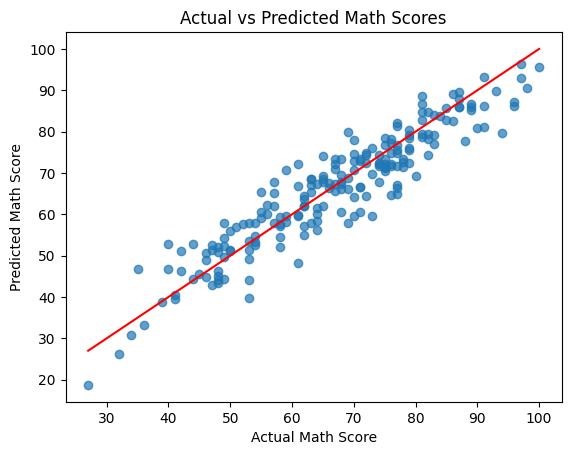

In [16]:
# Actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()

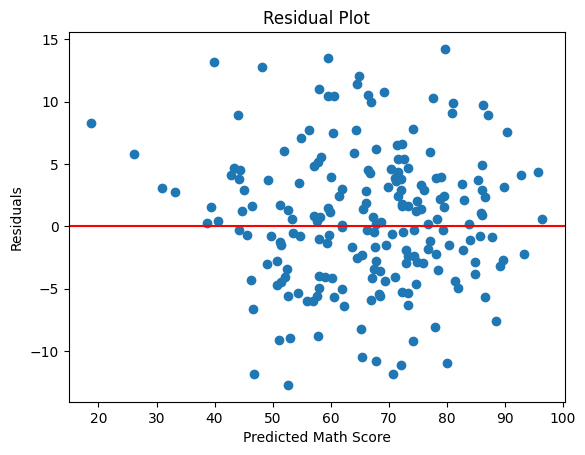

In [17]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Math Score")
plt.ylabel("Residuals")
plt.show()

In [19]:
# 8. BONUS: Separate models by gender
genders = df['gender'].unique()
for gender in genders:
    print(f"\nGender: {gender}")
    df_gender = df[df['gender'] == gender]
    X_gender = df_gender.drop('math score', axis=1)
    y_gender = df_gender['math score']

    X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X_gender, y_gender, test_size=0.2, random_state=42)

    model_g = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    model_g.fit(X_train_g, y_train_g)
    y_pred_g = model_g.predict(X_test_g)

    r2_g = r2_score(y_test_g, y_pred_g)
    mae_g = mean_absolute_error(y_test_g, y_pred_g)
    rmse_g = np.sqrt(mean_squared_error(y_test_g, y_pred_g))

    print(f"R² Score: {r2_g:.3f}")
    print(f"MAE: {mae_g:.2f}")
    print(f"RMSE: {rmse_g:.2f}")


Gender: female
R² Score: 0.876
MAE: 4.52
RMSE: 5.58

Gender: male
R² Score: 0.848
MAE: 4.59
RMSE: 5.49


In [20]:
#CONCLUSIONS:
#- The model demonstrates a moderate ability to predict math scores based on demographic and preparation factors, with an R² of {:.1f}%.
#- Students who completed the test preparation course tend to have higher math scores, as seen in boxplots and model coefficients.
#- Parental education level also shows a visible effect on scores, with higher education generally linked to better performance.
#- Data cleaning (removal of duplicates, missing value check, outlier capping) contributed to building a more robust model.
#- Gender-specific models show slight variation in performance, suggesting possible behavioral or systemic differences.
#- Further improvements could involve interaction terms or non-linear models.